### The Perceptron
This notebook will demonstrate Rosenblatt's perceptron using the Iris dataset. The perceptron is considered one of the early breakthroughs in machine learning and artificial intelligence. The perceptron is a simple model where input features are multiplied by weights and summed to get a value which is compared to a threshold value. The ouput is 1 if the summed value is greater than the threshold, 0 otherwise.

<img src="perceptron.png">

The figure above shows the input features X and the weights W. The first input feature is the bias value and W[0] is the weight for the bias. When a bias is included, the threshold becomes 0. This allows the model to effectively learn the threshold as well as the weights for the features.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

For our example, we will use the Iris dataset. This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

In [2]:
#import dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The dataset contains measurement data for 3 different kinds of irises. Each entry has 4 features: sepal_length, sepal_width, petal_length, and petal_width. For our example in this notebook, we will only consider two types of irises and only use the first two features.

In [3]:
# get the first 50 rows (which are all setosas) with only 2 features (petal length & sepal length)
setosa = np.array(df.iloc[0:50, [0,2]])

# get rows 50-100 (which are all versicolor) with only 2 features (petal length & sepel length)
versicolor = np.array(df.iloc[50:100, [0,2]])

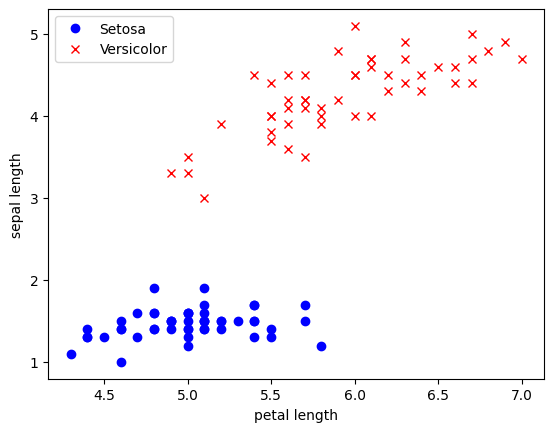

In [4]:
# plot points where blue o's denote setosa & red x's denote versicolor
plt.plot(setosa[:, 0], setosa[:, 1], "bo", label="Setosa")
plt.plot(versicolor[:, 0], versicolor[:, 1], "rx", label="Versicolor")
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.legend(loc='upper left')
plt.show()

#### The perceptron

To train a perceptron to classify two seperate entities given a number of features, the fit method runs a specified number of epochs (times through the complete training set) running through the perceptron training algorithm, updating the weights based on the error recieved with each sample.

Once the training process in done we have an optimized set of weights that can be used along with the features to classify unlabelled data.

In [ ]:
class Perceptron():
    # initialize hyperparameters (learning rate and number of iterations)
    def __init__(self, learning_rate=0.1, n_epochs=50):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
    
    def initialize_weights(self, num_features):
        self.w_ = [random.uniform(-1.0, 1.0) for _ in range(1 + num_features)]      # randomly initialize weights and add a bias term:  w_[0]
        
    def fit(self, X, y):      
        self.initialize_weights(X.shape[1])                                         # initialize weights for the number of features in the dataset
        self.errors_ = []                                                           # keeps tracks of the number of errors per iteration for observation purposes

        # iterate over labelled dataset updating weights for each features accordingly
        for _ in range(self.n_epochs):
            errors = 0
            for xi, label in zip(X, y):                                             # iterate over each sample in the dataset and its label
                # update the weights according to the perceptron learning run: update = learning rate * (true label - predicted label) * feature
                update = self.learning_rate * (label - self.predict(xi))
                self.w_[1:] += update * xi                                          # update the vector of weights scaled by the features
                self.w_[0] += update * 1                                            # update the bias - that feature is always 1
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    # compute the score i.e scalar sum of X and the weights plus the bias value
    def score(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] * 1

    # predict a classification for a sample of features X
    def predict(self, X):
        return np.where(self.score(X) >= 0.0, 1, 0)                                  # since we use a bias term, we can use 0 as the threshold

In [6]:
# preparing our data to be understood by our model
X = df.iloc[0:100, [0,2]].values                        # get the first 100 rows with only the first and second features
y = df.iloc[0:100, 4].values                            # get the labels for the first 100 rows
y = np.where(y == 'Iris-setosa', 0, 1)

ppn = Perceptron(n_epochs=10)     # initializing a new perceptron
ppn.fit(X, y)                   # training

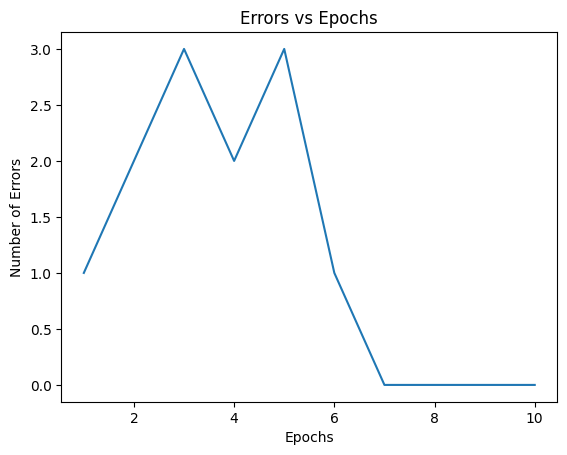

In [9]:
# plotting errors against number of iterations
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel("Epochs")
plt.ylabel("Number of Errors")
plt.title("Errors vs Epochs")

plt.show()

#### Plotting the decision boundary
In a simple 2 dimensional case, the decision boundary is a line. <br>

The slope of that line is the negative value of the ratio of the weights. <br>
$M = -W[1]/W[2]$ where $W[0]$ is the bias weight <br>

The y-intercept is the negation of the bias weight divided by weight 2. <br>
$B = -W[0]/W[2]$

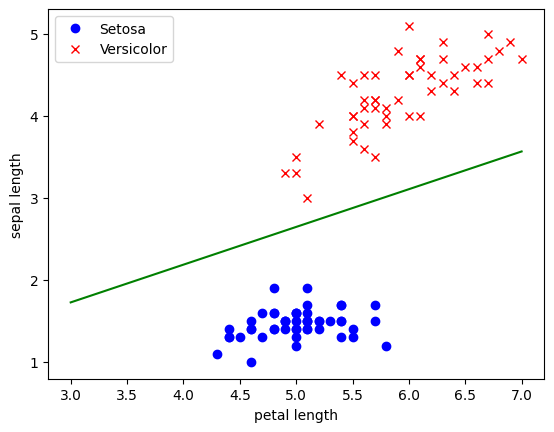

In [8]:
# plotting the decision boundary
plt.plot(setosa[:, 0], setosa[:, 1], "bo", label="Setosa")
plt.plot(versicolor[:, 0], versicolor[:, 1], "rx", label="Versicolor")
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.legend(loc='upper left')

bias = ppn.w_[0]
M = -ppn.w_[1]/ppn.w_[2]
B = -bias/ppn.w_[2]

x = np.linspace(3, 7, 100)
y = M * x + B
plt.plot(x, y, "g-")
plt.show()
